In [1]:
using Polynomials
using Plots

#Liczenie postaci interpolacyjnej Lagrange

function Lagrange(sigmas, xs) #liczy postać Lagrange na podstawie sigm
    p = Poly([0])
    n = 1
    while(n <= length(sigmas))
        arr = filter(e -> e != xs[n], xs)
        factor = Factor(arr)
        p += (sigmas[n] * factor)
        n += 1
    end
    return p
end

function CountSigmas(xs, ys)
    s = []
    n = 1
    while(n <= length(xs))
        push!(s, Sigma(xs, xs[n], ys[n]))
        n += 1
    end
    return s
end

function Factor(arr) #zwraca wielomian (x-x0)(x-1)...(x-xn)
    p = Poly([1])
    n = 1
    while(n <= length(arr))
        p = p * Poly([-arr[n], 1])
        n += 1
    end
    return p
end

function Sigma(arr, xi, pxi) #liczy sigmy w postaci Lagrange
    ar = filter(e->e != xi, arr)
    s = Factor(ar)
    s = polyval(s, xi)
    s = 1/s
    s *= pxi
    return s
end

#xs = [0,1,2,3,4,5]
#ys = [2, 4, 8, 0, 14, 7]
#sigs = CountSigmas(xs, ys)
#poly = Lagrange(sigs, xs)
#println(sigs)
#println("lagrange:")
#println(poly)
#f(x) = poly(x)
#plot(f, 0, 5)

Sigma (generic function with 1 method)

In [2]:
function Newtonb(k, sigmas, xs)
    b = 0
    n = 1
    while(n <= k)
        arr = filter(e -> e>xs[k], xs)
        #println(b)
        factor = Factor(arr)(xs[n])
        b += sigmas[n] * factor
        n += 1
        #println(b)
    end
    return b
end

function Newton(sigmas, xs)
    p = Poly(0)
    bs = []
    n = 1
    while(n <= length(sigmas))
        b = Newtonb(n, sigmas, xs)
        push!(bs, Newtonb(n, sigmas, xs))
        n +=1
    end
    
    n = 1
    while(n <= length(sigmas))
        arr = filter(e -> e<xs[n], xs)
        factor = Factor(arr)
        #println(roots(factor))
        p += (bs[n] * factor)
        n += 1
    end
    return p
end
    
    
#n(x) = Newton(sigs, xs)(x)
#plot(n, 0, 5)


Newton (generic function with 1 method)

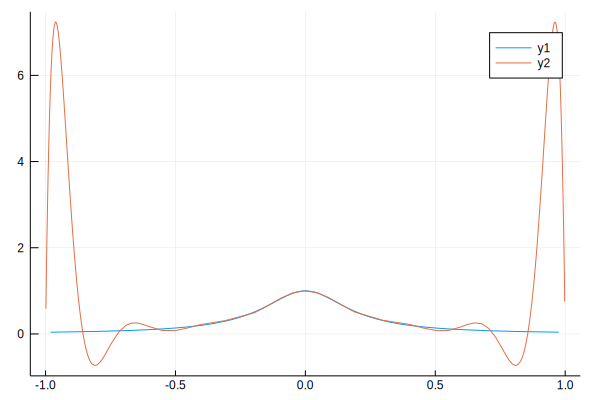

In [3]:
function runge(x)
    return 1/(25x^2+1)
end

function getxs(n, from, to)
    arr = []
    delta = (to-from)/(n-1)
    while(from <= to)
        push!(arr, from)
        from += delta
    end
    return arr
end

function getys(xs, f)
    return map(f, xs)
end

function integral(a,b, f, d)
    sum = 0
    while(a<=b)
        sum += f(a)*d
        a += d
    end
    return sum
end

function error(x, xfl)
    return abs(x-xfl)/abs(x)
end
    

g(x) = runge(x)
from = -1
to = 1

xs = getxs(15, from, to)
ys = getys(xs, g)
sigs = CountSigmas(xs,ys)
lag(x) = Lagrange(sigs, xs)(x)
new(x) = Newton(sigs, xs)(x)


#g_i = quadgk(g, from, to)[1] #przybliża całkę funkcji g
#l_i = quadgk(lag, from, to)[1]
#n_i = quadgk(new, from, to)[1]
#println(error(g_i, l_i))
#println(error(g_i, n_i))
plot([g, lag], from, to)


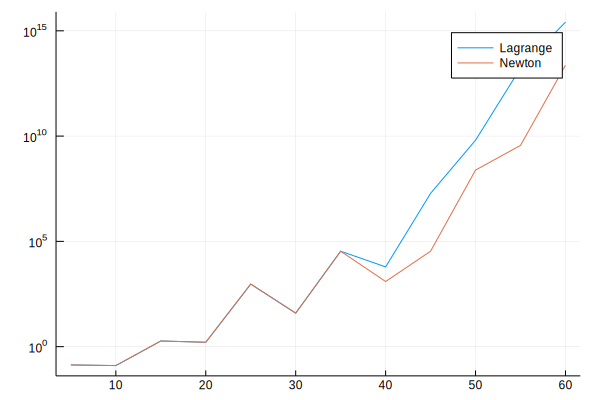

In [4]:
#wykres różnicy pomiędzy Lagrange a Newton
xpl = [5,10,15,20,25,30,35,40,45,50,55,60]

lpl = [ 0.13557534297258458, 0.12645755446806084, 1.861896632214439, 
    1.6139542407126757, 937.8455100036,39.0862425712,
    34058.16154833964, 6124.471689829559, 1.9074566374058582e7,
    6.389245747536483e9, 1.6939916086568936e13, 2.5882516641083465e15]
npl = [ 0.13557534297258358, 0.12645755446809195, 1.861896632412206,
1.6139542476520101, 937.8454874713608, 39.071024755552465,
34061.30886234113, 1239.104709866904, 34169.057120840494,
2.4392765749552375e8, 3.6227868591430264e9, 2.3350489143787973e13]
data = [lpl, npl]
labels = ["Lagrange", "Newton"]
plot(xpl, data, label=labels, yaxis = (:log))

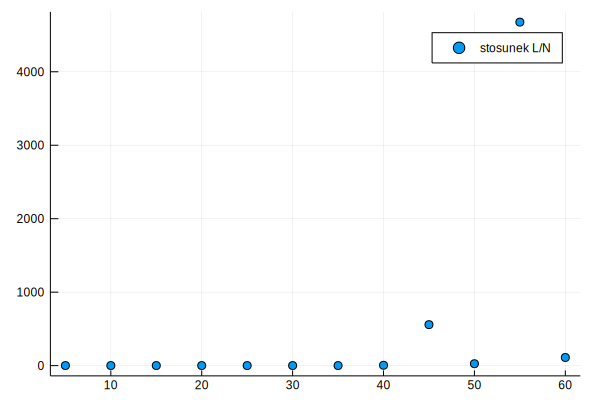

In [16]:
i = 1
ers = []
while(i<=length(lpl))
    push!(ers, lpl[i]/npl[i])
    i+=1
end
#[1.0, 1.0, 1.0, 1.0, 1.0, 1.00039, 0.999908, 4.94266, 558.241, 26.1932, 4675.94, 110.844]
labels = ["stosunek L/N"]
plot(xpl, ers,seriestype=:scatter, label = labels)